In [12]:
import camelot
import matplotlib.pyplot as plt

# Camelot advanced stuff

It's all from https://camelot-py.readthedocs.io/en/master/user/advanced.html, this is basically "Soma cut and pasted some code and downloaded the PDFs for me," although I didn't copy over most of the text that actually helps you understand the code.

# Backgrounds

In [13]:
tables = camelot.read_pdf('background_lines.pdf')
tables

<TableList n=1>

In [14]:
tables = camelot.read_pdf('background_lines.pdf', process_background=True)
tables[0].df

,0,1,2
0,The Red Ribbon Express (RRE) is the world’s la...,,
1,,,
2,,,


In [15]:
tables[1].df

,0,1,2,3,4,5,6,7
0,State,Date,Halt \nstations,Halt \ndays,Persons \ndirectly \nreached\n(in lakh),Persons \ntrained,Persons \ncounseled,Persons \ntested\nfor HIV
1,Delhi,1.12.2009,8,17,1.29,"3,665","2,409","1,000"
2,Rajasthan,2.12.2009 to \n19.12.2009,,,,,,
3,Gujarat,20.12.2009 to \n3.1.2010,6,13,6.03,"3,810","2,317","1,453"
4,Maharashtra,4.01.2010 to \n1.2.2010,13,26,1.27,"5,680","9,027","4,153"
5,Karnataka,2.2.2010 to \n22.2.2010,11,19,1.80,"5,741","3,658","3,183"
6,Kerala,23.2.2010 to \n11.3.2010,9,17,1.42,"3,559","2,173",855
7,Total,,47,92,11.81,"22,455","19,584","10,644"


In [16]:
tables = camelot.read_pdf('foo.pdf')
tables[0]

<Table shape=(7, 7)>

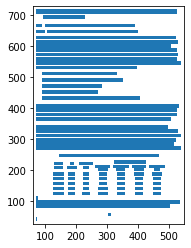

In [17]:
camelot.plot(tables[0], kind='text')
plt.show()

In [18]:
# %matplotlib notebook
# camelot.plot(tables[0], kind='text')
# plt.show()

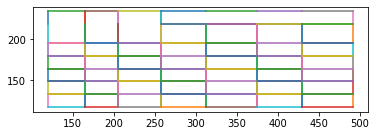

In [19]:
camelot.plot(tables[0], kind='grid')
plt.show()

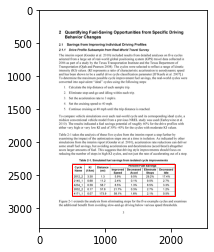

In [20]:
camelot.plot(tables[0], kind='contour')
plt.show()

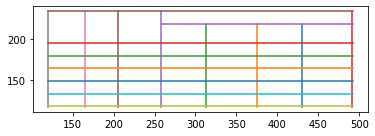

In [21]:
camelot.plot(tables[0], kind='line')
plt.show()

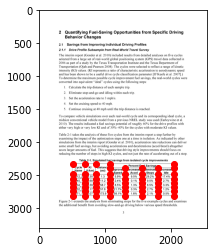

In [22]:
camelot.plot(tables[0], kind='joint')
plt.show()

# `table_areas`

> In cases such as these, it can be useful to specify exact table boundaries. You can plot the text on this page and note the top left and bottom right coordinates of the table.

In [23]:
tables = camelot.read_pdf('table_areas.pdf')
tables

<TableList n=0>

In [24]:
tables = camelot.read_pdf('table_areas.pdf', flavor='stream', table_areas=['316,499,566,337'])
tables[0].df

,0,1
0,,One Withholding
1,Payroll Period,Allowance
2,Weekly,$\n71.15
3,Biweekly,142.31
4,Semimonthly,154.17
5,Monthly,308.33
6,Quarterly,925.00
7,Semiannually,"1,850.00"
8,Annually,"3,700.00"
9,Daily or Miscellaneous,14.23


# `table_regions`

> However there may be cases where the table might not lie at the exact coordinates every time but in an approximate region.
>
> You can use the table_regions keyword argument to read_pdf() to solve for such cases. When table_regions is specified, Camelot will only analyze the specified regions to look for tables.

In [25]:
tables = camelot.read_pdf('table_regions.pdf')
tables

<TableList n=1>

In [26]:
tables = camelot.read_pdf('table_regions.pdf', table_regions=['170,370,560,270'])
tables[0].df

,0,1
0,Età dell’Assicurato \nall’epoca del decesso,Misura % di \nmaggiorazione
1,18-75,"1,00%"
2,76-80,"0,50%"
3,81 in poi,"0,10%"


# `column_separators`

In [27]:
camelot.read_pdf("column_separators.pdf", flavor='stream')
tables

<TableList n=1>

In [28]:
tables = camelot.read_pdf('column_separators.pdf', flavor='stream', columns=['72,95,209,327,442,529,566,606,683'])
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,,FEBRUARY 2014 M27 (BUS),,,,,,,,
1,,,,,OF ACTIVE LICENSES,,,,,3/19/2014
2,,,,,OKLAHOMA ABLE COMMISSION,,,,,
3,LICENSE,,,,PREMISE,,,,,
4,NUMBER TYPE DBA NAME,,,LICENSEE NAME,ADDRESS,CITY,ST,ZIP,PHONE NUMBER,EXPIRES
5,,648765 AAA,,ALLEGIANT AIR ALLEGIANT AIR...,,,OK,73159,-,2014/12/03
6,,,,,7777 EAST APACHE,,,,,
7,,648766 AAA,,ALLEGIANT AIR ALLEGIANT AIR...,STREET,TULSA,OK,74115,-,2014/12/16
8,,82030 AAA,,AMERICAN AIRLINES AMERICAN AIRLINES ...,,,OK,73159,(405) 680-3701,2014/09/14
9,,509462 AAA,,AMERICAN AIRLINES AMERICAN AIRLINES ...,,,OK,74115,(918) 831-6302,2014/08/19


# `split_text`

> To deal with cases like the output from the previous section, you can pass split_text=True to read_pdf(), which will split any strings that lie in different cells but have been assigned to a single cell (as a result of being merged together by PDFMiner).



In [29]:
tables = camelot.read_pdf('column_separators.pdf', flavor='stream', columns=['72,95,209,327,442,529,566,606,683'], split_text=True)
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,FEB,RUAR,Y 2014 M27 (BUS),,,,,,,
1,,,,,OF ACTIVE LICENSES,,,,,3/19/2014
2,,,,,OKLAHOMA ABLE COMMIS,SION,,,,
3,LICENSE,,,,PREMISE,,,,,
4,NUMBER,TYPE,DBA NAME,LICENSEE NAME,ADDRESS,CITY,ST,ZIP,PHONE NUMBER,EXPIRES
5,648765,AAA,ALLEGIANT AIR,ALLEGIANT AIR LLC,7100 TERMINAL DRIVE,OKLAHOMA CITY,OK,73159,-,2014/12/03
6,,,,,7777 EAST APACHE,,,,,
7,648766,AAA,ALLEGIANT AIR,ALLEGIANT AIR LLC,STREET,TULSA,OK,74115,-,2014/12/16
8,82030,AAA,AMERICAN AIRLINES,AMERICAN AIRLINES INC,7100 TERMINAL DRIVE,OKLAHOMA CITY,OK,73159,(405) 680-3701,2014/09/14
9,509462,AAA,AMERICAN AIRLINES,AMERICAN AIRLINES INC,7777 EAST APACHE DRIVE,TULSA,OK,74115,(918) 831-6302,2014/08/19


# Superscript

In [34]:
tables = camelot.read_pdf('superscript.pdf', flavor='stream')
tables[0].df

,0,1,2,3,4,5,6,7,8,9,10
0,States,Total,Market,NSSF,WMA,Loans,Loans,Loans,Loans,Loans,Loans
1,,Internal,Loans,,from,from,from,from,from,from SBI,from
2,,Debt,,,RBI,Banks,LIC,GIC,NABARD,& Other,NCDC
3,,,,,,& FIs,,,,Banks,
4,1,2=,3,4,5,6=,7,8,9,10,11
5,,(3 to 6)+14,,,,(7 to13),,,,,
6,Andhra Pradesh,48.11,40.45,-,3.26,4.4,2.62,-,0.91,-,0.25
7,Arunachal Pradesh,1.23,1.1,-,-,0.13,-,-,-,-,-
8,Assam,12.69,10.02,-,2.41,0.26,0.08,-,-0.06,0.01,0.24
9,Bihar,40.75,41.54,-,-,-1.42,0.19,-,-1.01,-0.36,0.2


In [35]:
tables = camelot.read_pdf('superscript.pdf', flavor='stream', flag_size=True)
tables[0].df

,0,1,2,3,4,5,6,7,8,9,10
0,States,Total,Market,NSSF,WMA,Loans,Loans,Loans,Loans,Loans,Loans
1,,Internal,Loans,,from,from,from,from,from,from SBI,from
2,,Debt,,,RBI,Banks,LIC,GIC,NABARD,& Other,NCDC
3,,,,,,& FIs,,,,Banks,
4,1,2=,3,4,5,6=,7,8,9,10,11
5,,(3 to 6)+14,,,,(7 to13),,,,,
6,Andhra Pradesh,48.11,40.45,-,3.26,4.4,2.62,-,0.91,-,0.25
7,Arunachal Pradesh,1.23,1.1,-,-,0.13,-,-,-,-,-
8,Assam,12.69,10.02,-,2.41,0.26,0.08,-,-0.06,0.01,0.24
9,Bihar,40.75,41.54,-,-,-1.42,0.19,-,-1.01,-0.36,0.2


# Strip unwanted characters

> You can strip unwanted characters like spaces, dots and newlines from a string using the strip_text keyword argument. Take a look at this PDF as an example, the text at the start of each row contains a lot of unwanted spaces, dots and newlines.



In [36]:
tables = camelot.read_pdf('12s0324.pdf', flavor='stream')
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,Program. Represents arrests reported (not char...,,,,,,,,,
1,by the FBI. Some persons may be arrested more ...,,,,,,,,,
2,could represent multiple arrests of the same p...,,,,,,,,,
3,,,Total,,,Male,,,Female,
4,Offense charged,,Under 18,18 years,,Under 18,18 years,,Under 18,18 years
5,,Total,years,and over,Total,years,and over,Total,years,and over
6,Total .\n .\n . . . . . .\n . .\n . ....,"11,062 .6","1,540 .0","9,522 .6","8,263 .3","1,071 .6","7,191 .7","2,799 .2",468 .3,"2,330 .9"
7,Violent crime . . . . . . . .\n . .\...,467 .9,69 .1,398 .8,380 .2,56 .5,323 .7,87 .7,12 .6,75 .2
8,Murder and nonnegligent,,,,,,,,,
9,manslaughter . . . . . . . .\n. .\n. .\n. .\n....,10.0,0.9,9.1,9.0,0.9,8.1,1.1,–,1.0


In [37]:
tables = camelot.read_pdf('12s0324.pdf', flavor='stream', strip_text=' .\n')
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,ProgramRepresentsarrestsreported(notcharged)by...,,,,,,,,,
1,bytheFBISomepersonsmaybearrestedmorethanoncedu...,,,,,,,,,
2,couldrepresentmultiplearrestsofthesamepersonSe...,,,,,,,,,
3,,,Total,,,Male,,,Female,
4,Offensecharged,,Under18,18years,,Under18,18years,,Under18,18years
5,,Total,years,andover,Total,years,andover,Total,years,andover
6,Total,"11,0626","1,5400","9,5226","8,2633","1,0716","7,1917","2,7992",4683,"2,3309"
7,Violentcrime,4679,691,3988,3802,565,3237,877,126,752
8,Murderandnonnegligent,,,,,,,,,
9,manslaughter,100,09,91,90,09,81,11,–,10


# Improve guessed table areas

In [38]:
tables = camelot.read_pdf('edge_tol.pdf', flavor='stream')
tables[0].df

,0,1,2
0,,,2016
1,(all amounts in EUR),,
2,C,lass A,
3,N,et Asset Value at 31 December,"5,111,372"
4,N,umber of outstanding units at 31 December,"49,136"
5,N,et Asset Value per unit at 31 December,104.03
6,C,lass B,
7,N,et Asset Value at 31 December,"49,144,825"
8,N,umber of outstanding units at 31 December,"471,555"
9,N,et Asset Value per unit at 31 December,104.22


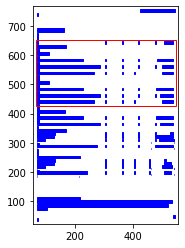

In [39]:
camelot.plot(tables[0], kind='contour')
plt.show()

> To improve the detected area, you can increase the edge_tol (default: 50) value to counter the effect of text being placed relatively far apart vertically. Larger edge_tol will lead to longer textedges being detected, leading to an improved guess of the table area. Let’s use a value of 500.



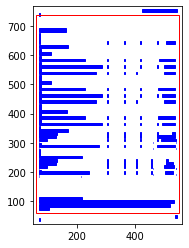

In [40]:
tables = camelot.read_pdf('edge_tol.pdf', flavor='stream', edge_tol=500)
camelot.plot(tables[0], kind='contour')
plt.show()

# Short lines

In [41]:
tables = camelot.read_pdf('short_lines.pdf')
tables[0].df

,0,1,2,3,4,5,6
0,Investigations,No. of\nHHs,Age/Sex/\nPreva-\nC.I*\nRelative\nSample size\...,,,,
1,Anthropometry,2400,All the available individuals,,,,
2,Clinical Examination,,,,,,
3,History of morbidity,,,,,,
4,Diet survey,1200,All the individuals partaking meals in the HH,,,,
5,Blood Pressure #,2400,Men (≥ 18yrs),10%,95%,20%,1728
6,,,Women (≥ 18 yrs),,,,1728
7,Fasting blood glucose,2400,Men (≥ 18 yrs),5%,95%,20%,1825
8,,,Women (≥ 18 yrs),,,,1825
9,Knowledge &\nPractices on HTN &\nDM,2400,Men (≥ 18 yrs),-,-,-,1728


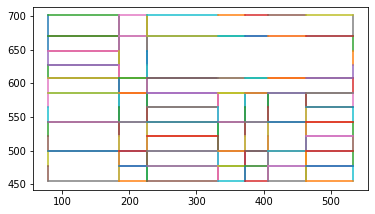

In [42]:
camelot.plot(tables[0], kind='grid')
plt.show()

> There might be cases while using Lattice when smaller lines don’t get detected. The size of the smallest line that gets detected is calculated by dividing the PDF page’s dimensions with a scaling factor called line_scale. By default, its value is 15.
> 
> As you can guess, the larger the line_scale, the smaller the size of lines getting detected.

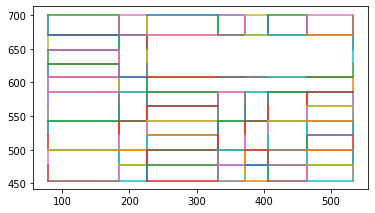

In [43]:
tables = camelot.read_pdf('short_lines.pdf', line_scale=40)
camelot.plot(tables[0], kind='grid')
plt.show()

In [44]:
tables[0].df

,0,1,2,3,4,5,6
0,Investigations,No. of\nHHs,Age/Sex/\nPhysiological Group,Preva-\nlence,C.I*,Relative\nPrecision,Sample size\nper State
1,Anthropometry,2400,All the available individuals,,,,
2,Clinical Examination,,,,,,
3,History of morbidity,,,,,,
4,Diet survey,1200,All the individuals partaking meals in the HH,,,,
5,Blood Pressure #,2400,Men (≥ 18yrs),10%,95%,20%,1728
6,,,Women (≥ 18 yrs),,,,1728
7,Fasting blood glucose,2400,Men (≥ 18 yrs),5%,95%,20%,1825
8,,,Women (≥ 18 yrs),,,,1825
9,Knowledge &\nPractices on HTN &\nDM,2400,Men (≥ 18 yrs),-,-,-,1728


# Shifting text

> By default, the Lattice method shifts text in spanning cells, first to the left and then to the top, as you can observe in the output table above. However, this behavior can be changed using the shift_text keyword argument. Think of it as setting the gravity for a table — it decides the direction in which the text will move and finally come to rest.
> 
> shift_text expects a list with one or more characters from the following set: ('', l', 'r', 't', 'b'), which are then applied in order. The default, as we discussed above, is ['l', 't'].
>
> We’ll use the PDF from the previous example. Let’s pass shift_text=[''], which basically means that the text will experience weightlessness! (It will remain in place.)



In [45]:
tables = camelot.read_pdf('short_lines.pdf', line_scale=40, shift_text=[''])
tables[0].df

,0,1,2,3,4,5,6
0,Investigations,No. of\nHHs,Age/Sex/\nPhysiological Group,Preva-\nlence,C.I*,Relative\nPrecision,Sample size\nper State
1,Anthropometry,,,,,,
2,Clinical Examination,2400,,All the available individuals,,,
3,History of morbidity,,,,,,
4,Diet survey,1200,,All the individuals partaking meals in the HH,,,
5,,,Men (≥ 18yrs),,,,1728
6,Blood Pressure #,2400,Women (≥ 18 yrs),10%,95%,20%,1728
7,,,Men (≥ 18 yrs),,,,1825
8,Fasting blood glucose,2400,Women (≥ 18 yrs),5%,95%,20%,1825
9,Knowledge &\nPractices on HTN &,2400,Men (≥ 18 yrs),-,-,-,1728


> No surprises there — it did remain in place (observe the strings “2400” and “All the available individuals”). Let’s pass shift_text=['r', 'b'] to set the gravity to right-bottom and move the text in that direction.



In [46]:
tables = camelot.read_pdf('short_lines.pdf', line_scale=40, shift_text=['r', 'b'])
tables[0].df

,0,1,2,3,4,5,6
0,Investigations,No. of\nHHs,Age/Sex/\nPhysiological Group,Preva-\nlence,C.I*,Relative\nPrecision,Sample size\nper State
1,Anthropometry,,,,,,
2,Clinical Examination,,,,,,
3,History of morbidity,2400,,,,,All the available individuals
4,Diet survey,1200,,,,,All the individuals partaking meals in the HH
5,,,Men (≥ 18yrs),,,,1728
6,Blood Pressure #,2400,Women (≥ 18 yrs),10%,95%,20%,1728
7,,,Men (≥ 18 yrs),,,,1825
8,Fasting blood glucose,2400,Women (≥ 18 yrs),5%,95%,20%,1825
9,,2400,Men (≥ 18 yrs),-,-,-,1728


# Copy text in spanning cells

In [47]:
tables = camelot.read_pdf('copy_text.pdf')
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,Sl. \nNo.,Name of \nState/UT,Name of \nDistrict,Disease/ Illness,No. of \nCases,No. of \nDeaths,Date of \nstart of \noutbreak,Date of \nreporting,Current \nStatus,Comments/ Action taken
1,1,Kerala,Kollam,i. Food \nPoisoning,19,0,31/12/13,03/01/14,Under \ncontrol,"Cases reported from Ward no III, Kottakupuram,..."
2,2,Maharashtra,Beed,i\ni. Dengue & \nChikungun\nya,11,0,03/01/14,04/01/14,Under \ncontrol,Cases of fever reported from Village Golharw...
3,3,Odisha,Kalahandi,iii. Food \nPoisoning,42,0,02/01/14,03/01/14,Under \ncontrol,Cases \nof \nloose motion \nand \nvomiting \n...
4,4,West Bengal,West \nMedinipur,iv. Acute \nDiarrhoeal \nDisease,145,0,04/01/14,05/01/14,Under \ncontrol,Outbreak of diarrhoea \nreported \nfrom Vil...
5,,,Birbhum,v. Food \nPoisoning,199,0,31/12/13,31/12/13,Under \ncontrol,An outbreak of food poisoning reported f...
6,,,Howrah,vi. Viral \nHepatitis A \n&E,85,0,26/12/13,27/12/13,Under \nsurveillance,Outbreak of \njaundice reported from urban...


In [48]:
tables = camelot.read_pdf('copy_text.pdf', copy_text=['v'])
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,Sl. \nNo.,Name of \nState/UT,Name of \nDistrict,Disease/ Illness,No. of \nCases,No. of \nDeaths,Date of \nstart of \noutbreak,Date of \nreporting,Current \nStatus,Comments/ Action taken
1,1,Kerala,Kollam,i. Food \nPoisoning,19,0,31/12/13,03/01/14,Under \ncontrol,"Cases reported from Ward no III, Kottakupuram,..."
2,2,Maharashtra,Beed,i\ni. Dengue & \nChikungun\nya,11,0,03/01/14,04/01/14,Under \ncontrol,Cases of fever reported from Village Golharw...
3,3,Odisha,Kalahandi,iii. Food \nPoisoning,42,0,02/01/14,03/01/14,Under \ncontrol,Cases \nof \nloose motion \nand \nvomiting \n...
4,4,West Bengal,West \nMedinipur,iv. Acute \nDiarrhoeal \nDisease,145,0,04/01/14,05/01/14,Under \ncontrol,Outbreak of diarrhoea \nreported \nfrom Vil...
5,4,West Bengal,Birbhum,v. Food \nPoisoning,199,0,31/12/13,31/12/13,Under \ncontrol,An outbreak of food poisoning reported f...
6,4,West Bengal,Howrah,vi. Viral \nHepatitis A \n&E,85,0,26/12/13,27/12/13,Under \nsurveillance,Outbreak of \njaundice reported from urban...
